## Observations and Insights 

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
study_results = study_results[study_results["Timepoint"] == 45]

# Combine the data into a single dataset
mouse_metadata.drop_duplicates("Mouse ID", inplace=True)
study_results.drop_duplicates("Mouse ID", inplace=True)
df = pd.merge(mouse_metadata,study_results, on=["Mouse ID","Mouse ID"], how='inner')
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
125,y769,Ceftamin,Female,6,27,45,68.594745,4
126,y865,Ceftamin,Male,23,26,45,64.729837,3
127,z581,Infubinol,Female,24,25,45,62.754451,3
128,z795,Naftisol,Female,13,29,45,65.741070,3


In [23]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
1763,n364,45,31.095335,1
1764,b128,45,38.982878,2
1765,l661,45,59.851956,3
1766,y865,45,64.729837,3
1767,y769,45,68.594745,4
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [2]:
# Checking the number of mice in the DataFrame.


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [6]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
df.describe()
# This method is the most straighforward, creating multiple series and putting them all together at the end.

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,130.000000,130.000000,130.0,130.000000,130.000000
mean,12.992308,24.953846,45.0,57.325726,2.276923
std,7.034242,4.258801,0.0,15.604044,1.245241
min,1.000000,15.000000,45.0,22.050126,0.000000
25%,8.000000,22.250000,45.0,40.658344,1.000000
50%,13.000000,26.000000,45.0,63.537546,2.000000
75%,19.750000,28.000000,45.0,68.870296,3.000000
max,24.000000,30.000000,45.0,78.567014,4.000000


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

## Bar Plots

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 

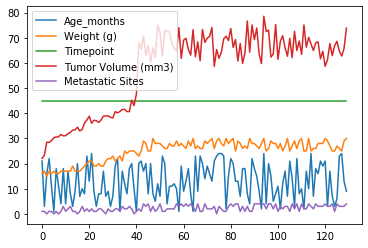

In [25]:
df.plot()

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

## Pie Plots

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
plt.plot()

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.scatter()


## Correlation and Regression

In [16]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
st.linregress(df["Weight (g)"],df["Tumor Volume (mm3)"])

LinregressResult(slope=0.0, intercept=45.0, rvalue=0.0, pvalue=1.0, stderr=0.0)

In [17]:
df["Weight (g)"]

0      16
1      17
2      15
3      17
4      16
       ..
244    28
245    26
246    25
247    29
248    30
Name: Weight (g), Length: 249, dtype: int64

In [18]:
df["Tumor Volume (mm3)"]

0      45.0
1      45.0
2      45.0
3      45.0
4      45.0
       ... 
244    45.0
245    45.0
246    45.0
247    45.0
248    45.0
Name: Tumor Volume (mm3), Length: 249, dtype: float64